In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



The main aim of this notebook is to train models for 250 dataset using RNN - LSTM
. We will use split network where it as two outputs and then merge.


In [2]:
musicFeatures = pd.read_pickle("./musicFeatures.pkl")  

In [3]:
musicFeatures.shape

(26900, 22)

In [4]:
musicFeatures.head(3)

,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [5]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>


We split the dataset into x and y, y having the predicting columns

In [6]:
#Spliting x and y

y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id'],axis =1)

print(x.shape)
print(y.shape)

(26900, 20)
(26900,)


Since we have an np array as in each cell, we need to reshape the data into a 3rd array for the network, we use the following function for the same.

In [7]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [8]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())



Final Sizes of all datasets
x_train : (21520, 20)
x_test : (2690, 20)
x_valid : (2690, 20)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64


Although the audio and theme features are numbers, they represent two different types of data. So we need to split them since the network will take them as two seperate inputs.

In [9]:
#splitting dataset into two parts

x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

x_train_theme = convertTo3DnpArray(x_train.iloc[:,15:])
x_test_theme = convertTo3DnpArray(x_test.iloc[:,15:])
x_valid_theme = convertTo3DnpArray(x_valid.iloc[:,15:])

print(x_train_audio.shape,x_train_theme.shape)

(21520, 250, 15) (21520, 250, 5)


In [10]:
x_train.iloc[:,0:15]

,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,mfccFeature_8,mfccFeature_9,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14
35394,"[-259.05927, -239.89516, -210.36134, -191.0854...","[95.85247, 89.139465, 100.31354, 114.44683, 12...","[-37.76436, -62.810684, -82.836006, -89.18021,...","[35.43055, 31.09402, 16.134083, 23.663452, 24....","[-3.8478534, -3.804813, -18.247433, -21.18354,...","[-5.8638554, -8.563865, -5.0026045, -3.563768,...","[-29.522072, -30.139166, -25.777792, -18.43643...","[-15.362446, -16.980038, -18.577564, -19.80409...","[-17.15803, -18.717222, -12.115081, -13.080694...","[4.9135947, 0.48395002, -2.3608677, -8.914128,...","[-6.845843, -8.657402, -8.819773, -13.005529, ...","[-7.297282, -4.4590926, -4.291797, -10.961505,...","[-8.618434, -8.838449, -20.322239, -25.85178, ...","[8.280407, 6.65845, -3.0541248, -7.157876, -7....","[8.006058, 4.326626, -4.908849, -5.9096045, -3..."
34049,"[-188.014, -206.20021, -225.0521, -220.18987, ...","[128.69154, 141.3887, 154.6398, 159.06891, 149...","[-13.482424, -30.97063, -57.24858, -63.42682, ...","[23.985256, 33.63526, 42.476974, 35.33845, 25....","[14.964792, 19.501078, 24.636375, 23.640629, 1...","[-17.882114, -18.361004, -14.050748, -11.75215...","[-20.248413, -13.562236, -8.63477, -8.473328, ...","[-14.179203, -10.178944, -10.123768, -12.31093...","[-5.8441324, -6.1650333, -3.1949024, -2.722711...","[10.911045, 8.321631, 6.160431, 0.95847726, 6....","[7.8805685, 4.39023, 5.0924635, -2.262684, -5....","[-2.038714, 0.29762447, 0.21831286, -1.5235238...","[-6.681349, -7.536511, -8.555668, -5.4461303, ...","[-9.045403, -11.071377, -10.651661, -8.457749,...","[-3.9182348, -0.5984701, -4.849672, -3.298818,..."
34247,"[-82.13368, -56.982624, -58.14949, -60.955105,...","[74.79721, 72.48038, 69.69021, 71.89056, 76.14...","[-9.761583, -8.974573, -13.565889, -18.574867,...","[44.51985, 46.574883, 50.270557, 49.844574, 45...","[-1.7989714, -5.9998593, -8.879391, -7.259489,...","[23.213932, 23.701248, 27.05341, 30.459, 28.99...","[8.85959, 6.395796, 3.8830438, 4.5139427, 5.85...","[10.348799, 16.238556, 20.261578, 19.654716, 2...","[13.655914, 8.072505, -0.37761527, 0.3474199, ...","[16.148502, 13.345703, 6.496121, 6.0975375, 11...","[-3.413521, -0.6451754, -8.567261, -14.476906,...","[-2.6246097, -2.939661, -0.95807236, -2.185254...","[-7.3780622, -13.883275, -14.423538, -12.80759...","[3.8376787, 6.9531918, 11.388884, 15.410437, 1...","[-2.1842833, -4.0735054, -3.4050357, -2.386907..."
35132,"[-74.62353, -47.188427, -43.740658, -31.355085...","[110.29732, 108.80856, 104.4259, 102.99172, 10...","[19.360918, 18.530136, 10.443481, -7.501622, -...","[32.394424, 31.694412, 30.137642, 27.804893, 2...","[-8.631376, -3.527607, 3.8489022, 4.4208837, -...","[5.9561634, 13.809061, 19.815063, 12.495829, 6...","[-8.04807, -11.654659, -10.895243, -18.075535,...","[9.950865, 10.536844, 17.713945, 17.78846, 17....","[9.039571, 1.4659774, -7.285754, -0.81587684, ...","[8.814006, 9.20682, 5.9413443, 8.706055, 9.271...","[-11.550571, -8.380802, -5.6130843, -1.6310983...","[4.697386, 7.635721, 12.914742, 15.211265, 10....","[-11.157985, -15.638721, -8.871193, -7.4123173...","[2.4558992, 2.0242095, 7.875683, 6.6735973, 0....","[-5.083339, -7.525996, -2.9894814, -2.4445453,..."
22687,"[-10.387641, -2.7015615, -25.830664, -42.18832...","[105.466125, 105.41113, 110.17697, 114.190765,...","[4.6587563, 3.691368, 2.1789696, 3.4156444, 2....","[23.292372, 30.258991, 41.930916, 45.1681, 44....","[3.5131118, 4.38157, 6.6126113, 12.240705, 11....","[6.5239367, 8.461456, 10.868671, 12.047181, 6....","[-17.583548, -17.156866, -19.27493, -18.639069...","[-1.9000115, 4.3362274, 5.219447, 5.1462927, 7...","[-8.118086, -10.51737, -15.752861, -18.01086, ...","[2.6302576, 0.49581635, 0.15905619, -1.2537093...","[-0.6385004, -1.2256694, -3.262991, -3.5495977...","[-3.275594, 3.6539168, 9.7260685, 10.16334, 11...","[-10.0126

In [11]:
ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)


In [12]:
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Flatten,concatenate,Dropout
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The following function is used to plot the graphs for train and loss accuracy.

In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

We first try small networks

In [13]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_LSTM1 = LSTM(64,return_sequences=True)(audio_in)
audio_LSTM2 = LSTM(64)(audio_LSTM1)
audio_dense = Dense(64, activation='relu')(audio_LSTM2)


#Theme layer

theme_LSTM1 = LSTM(64,return_sequences=True)(theme_in)
theme_LSTM2 = LSTM(64)(theme_LSTM1)
theme_dense = Dense(64, activation='relu')(theme_LSTM2)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model = Model(inputs=[audio_in,theme_in], outputs=[op])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 14)]    0           []                               
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 250, 64)      20224       ['audio_in[0][0]']               
                                                                                                  
 lstm_2 (LSTM)                  (None, 250, 64)      17920       ['theme_in[0][0]']               
                                                                                              

Epoch 1/50
673/673 [==============================] - 109s 155ms/step - loss: 1.6445 - accuracy: 0.3675 - val_loss: 1.5509 - val_accuracy: 0.4152
Epoch 2/50
673/673 [==============================] - 100s 148ms/step - loss: 1.4582 - accuracy: 0.4620 - val_loss: 1.4280 - val_accuracy: 0.4751
Epoch 3/50
673/673 [==============================] - 101s 149ms/step - loss: 1.3696 - accuracy: 0.4993 - val_loss: 1.3314 - val_accuracy: 0.5171
Epoch 4/50
673/673 [==============================] - 101s 150ms/step - loss: 1.2420 - accuracy: 0.5543 - val_loss: 1.2500 - val_accuracy: 0.5375
Epoch 5/50
673/673 [==============================] - 101s 150ms/step - loss: 1.1056 - accuracy: 0.6071 - val_loss: 1.1165 - val_accuracy: 0.5926
Epoch 6/50
673/673 [==============================] - 101s 151ms/step - loss: 0.9839 - accuracy: 0.6542 - val_loss: 1.0116 - val_accuracy: 0.6428
Epoch 7/50
673/673 [==============================] - 102s 151ms/step - loss: 0.8561 - accuracy: 0.7001 - val_loss: 0.9252 -

INFO:tensorflow:Assets written to: simple_rnn_model\assets


INFO:tensorflow:Assets written to: simple_rnn_model\assets


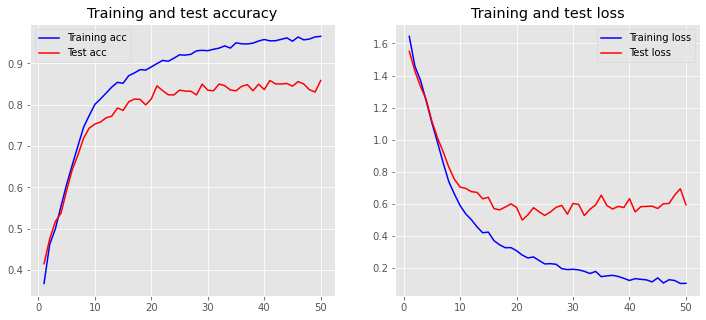

In [14]:

model.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h=model.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model.save('simple_rnn_model')


plot_history(h)

We then widen and add some dropout layers

In [28]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_LSTM1 = LSTM(128,return_sequences=True,dropout=0.1)(audio_in)
audio_LSTM2 = LSTM(64,recurrent_dropout=0.1)(audio_LSTM1)
audio_dense = Dense(64, activation='relu')(audio_LSTM2)


#Theme layer

theme_LSTM1 = LSTM(128,return_sequences=True,dropout=0.1)(theme_in)
theme_LSTM2 = LSTM(64,recurrent_dropout=0.1)(theme_LSTM1)
theme_dense = Dense(64, activation='relu')(theme_LSTM2)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dropout1 = Dropout(0.1)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model2 = Model(inputs=[audio_in,theme_in], outputs=[op])

model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                                  
 lstm_28 (LSTM)                 (None, 250, 128)     73728       ['audio_in[0][0]']               
                                                                                                  
 lstm_30 (LSTM)                 (None, 250, 128)     68608       ['theme_in[0][0]']               
                                                                                            

Epoch 1/50
673/673 [==============================] - 227s 332ms/step - loss: 1.5306 - accuracy: 0.4328 - val_loss: 1.5317 - val_accuracy: 0.4178
Epoch 2/50
673/673 [==============================] - 283s 420ms/step - loss: 1.4534 - accuracy: 0.4656 - val_loss: 1.4314 - val_accuracy: 0.4729
Epoch 3/50
673/673 [==============================] - 364s 541ms/step - loss: 1.4543 - accuracy: 0.4664 - val_loss: 1.4527 - val_accuracy: 0.4628
Epoch 4/50
673/673 [==============================] - 378s 561ms/step - loss: 1.4042 - accuracy: 0.4845 - val_loss: 1.4249 - val_accuracy: 0.4784
Epoch 5/50
673/673 [==============================] - 381s 566ms/step - loss: 1.3300 - accuracy: 0.5157 - val_loss: 1.3557 - val_accuracy: 0.4937
Epoch 6/50
673/673 [==============================] - 316s 470ms/step - loss: 1.2675 - accuracy: 0.5385 - val_loss: 1.2745 - val_accuracy: 0.5394
Epoch 7/50
673/673 [==============================] - 311s 461ms/step - loss: 1.2017 - accuracy: 0.5653 - val_loss: 1.2238 -

INFO:tensorflow:Assets written to: light_dropout_only_rnn_model\assets


INFO:tensorflow:Assets written to: light_dropout_only_rnn_model\assets


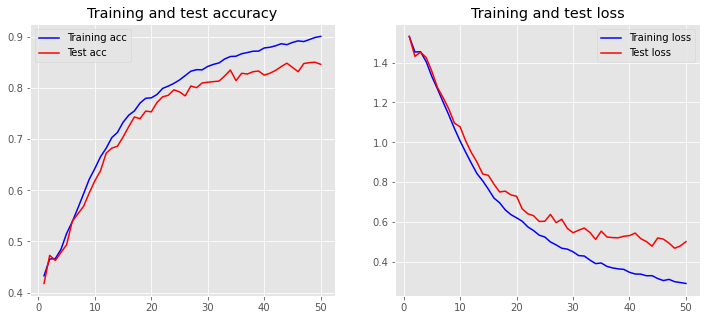

In [30]:

model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h2=model2.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model2.save('light_dropout_only_rnn_model')


plot_history(h2)

Epoch 1/30
673/673 [==============================] - 436s 648ms/step - loss: 0.2838 - accuracy: 0.9017 - val_loss: 0.5229 - val_accuracy: 0.8420
Epoch 2/30
673/673 [==============================] - 429s 638ms/step - loss: 0.2796 - accuracy: 0.9031 - val_loss: 0.5363 - val_accuracy: 0.8442
Epoch 3/30
673/673 [==============================] - 423s 629ms/step - loss: 0.2726 - accuracy: 0.9061 - val_loss: 0.4700 - val_accuracy: 0.8546
Epoch 4/30
673/673 [==============================] - 420s 624ms/step - loss: 0.2662 - accuracy: 0.9084 - val_loss: 0.4555 - val_accuracy: 0.8561
Epoch 5/30
673/673 [==============================] - 421s 626ms/step - loss: 0.2613 - accuracy: 0.9105 - val_loss: 0.4735 - val_accuracy: 0.8532
Epoch 6/30
673/673 [==============================] - 423s 628ms/step - loss: 0.2520 - accuracy: 0.9090 - val_loss: 0.4965 - val_accuracy: 0.8450
Epoch 7/30
673/673 [==============================] - 422s 627ms/step - loss: 0.2516 - accuracy: 0.9130 - val_loss: 0.4932 -

INFO:tensorflow:Assets written to: light_dropout_only_rnn_model_continued\assets


INFO:tensorflow:Assets written to: light_dropout_only_rnn_model_continued\assets


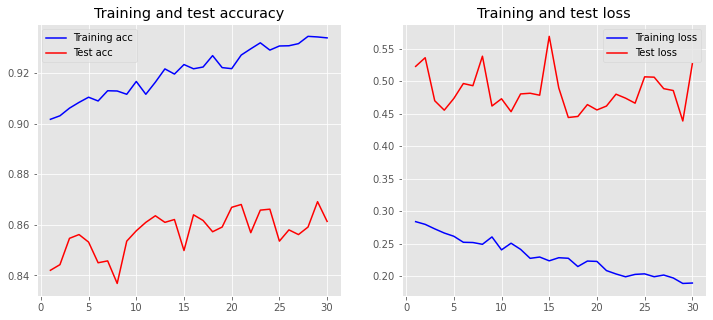

In [31]:
#continuing the training of the model for 30 more

h2=model2.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=30, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model2.save('light_dropout_only_rnn_model_continued')


plot_history(h2)



We add LSTM layers post concatenation also

In [46]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_LSTM1 = LSTM(64,return_sequences=True)(audio_in)
audio_LSTM2 = LSTM(64,return_sequences=True)(audio_LSTM1)


#Theme layer

theme_LSTM1 = LSTM(64,return_sequences=True)(theme_in)
theme_LSTM2 = LSTM(64,return_sequences=True)(theme_LSTM1)


#Concatenation 
concat = concatenate([audio_LSTM2, theme_LSTM2])
LSTM1 = LSTM(64,return_sequences=True)(concat)
LSTM2 = LSTM(32)(LSTM1)
dense2 = Dense(16, activation='relu')(LSTM2)
op = Dense(7, activation='softmax',name='op')(dense2)


model3 = Model(inputs=[audio_in,theme_in], outputs=[op])

model3.summary()


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                                  
 lstm_92 (LSTM)                 (None, 250, 64)      20480       ['audio_in[0][0]']               
                                                                                                  
 lstm_94 (LSTM)                 (None, 250, 64)      17920       ['theme_in[0][0]']               
                                                                                           

Epoch 1/50
673/673 [==============================] - 378s 555ms/step - loss: 1.6236 - accuracy: 0.3805 - val_loss: 1.5232 - val_accuracy: 0.4230
Epoch 2/50
673/673 [==============================] - 391s 582ms/step - loss: 1.5005 - accuracy: 0.4473 - val_loss: 1.4769 - val_accuracy: 0.4498
Epoch 3/50
673/673 [==============================] - 364s 540ms/step - loss: 1.4056 - accuracy: 0.4923 - val_loss: 1.3755 - val_accuracy: 0.5119
Epoch 4/50
673/673 [==============================] - 360s 535ms/step - loss: 1.3247 - accuracy: 0.5277 - val_loss: 1.3253 - val_accuracy: 0.5297
Epoch 5/50
673/673 [==============================] - 354s 526ms/step - loss: 1.2360 - accuracy: 0.5606 - val_loss: 1.2531 - val_accuracy: 0.5454
Epoch 6/50
673/673 [==============================] - 308s 457ms/step - loss: 1.1437 - accuracy: 0.5962 - val_loss: 1.1494 - val_accuracy: 0.5948
Epoch 7/50
673/673 [==============================] - 307s 457ms/step - loss: 1.0538 - accuracy: 0.6323 - val_loss: 1.1001 -

INFO:tensorflow:Assets written to: full_rnn_model\assets


INFO:tensorflow:Assets written to: full_rnn_model\assets


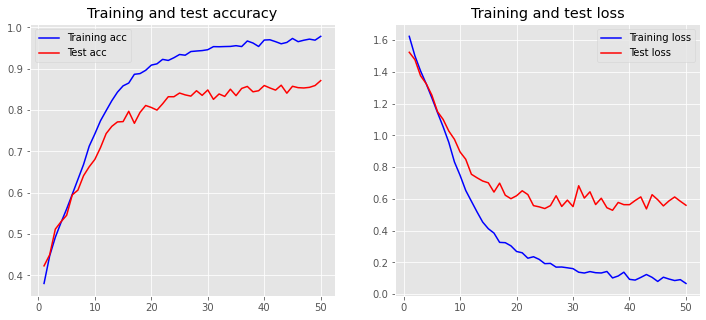

In [47]:
#All LSTM layers


model3.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h3=model3.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model3.save('full_rnn_model')


plot_history(h3)


We revert back to a more generalized model with equal regularization

In [56]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_LSTM1 = LSTM(64,return_sequences=True,dropout=0.1)(audio_in)
audio_LSTM2 = LSTM(32,recurrent_dropout=0.1)(audio_LSTM1)
audio_dense = Dense(32, activation='relu')(audio_LSTM2)


#Theme layer

theme_LSTM1 = LSTM(64,return_sequences=True,dropout=0.1)(theme_in)
theme_LSTM2 = LSTM(32,recurrent_dropout=0.1)(theme_LSTM1)
theme_dense = Dense(32, activation='relu')(theme_LSTM2)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(32, activation='relu')(concat)
dropout1 = Dropout(0.1)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model4 = Model(inputs=[audio_in,theme_in], outputs=[op])

model4.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                                  
 lstm_124 (LSTM)                (None, 250, 64)      20480       ['audio_in[0][0]']               
                                                                                                  
 lstm_126 (LSTM)                (None, 250, 64)      17920       ['theme_in[0][0]']               
                                                                                           

Epoch 1/50
673/673 [==============================] - 160s 225ms/step - loss: 1.7081 - accuracy: 0.3388 - val_loss: 1.6768 - val_accuracy: 0.3613
Epoch 2/50
673/673 [==============================] - 149s 221ms/step - loss: 1.5962 - accuracy: 0.3931 - val_loss: 1.5908 - val_accuracy: 0.3818
Epoch 3/50
673/673 [==============================] - 148s 219ms/step - loss: 1.5194 - accuracy: 0.4263 - val_loss: 1.4976 - val_accuracy: 0.4279
Epoch 4/50
673/673 [==============================] - 147s 218ms/step - loss: 1.4513 - accuracy: 0.4621 - val_loss: 1.4508 - val_accuracy: 0.4610
Epoch 5/50
673/673 [==============================] - 147s 218ms/step - loss: 1.3943 - accuracy: 0.4858 - val_loss: 1.3738 - val_accuracy: 0.4944
Epoch 6/50
673/673 [==============================] - 146s 217ms/step - loss: 1.3326 - accuracy: 0.5171 - val_loss: 1.3873 - val_accuracy: 0.4944
Epoch 7/50
673/673 [==============================] - 147s 218ms/step - loss: 1.2925 - accuracy: 0.5291 - val_loss: 1.2868 -

INFO:tensorflow:Assets written to: small_rnn_model\assets


INFO:tensorflow:Assets written to: small_rnn_model\assets


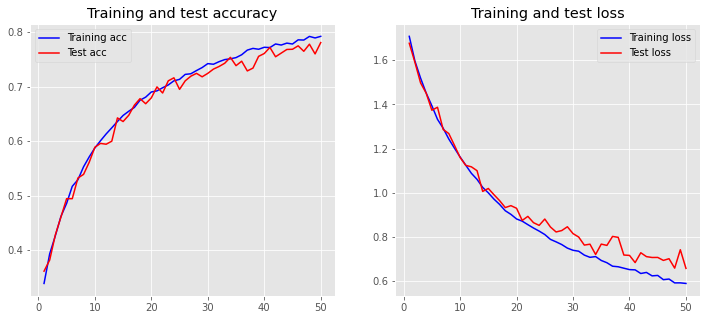

In [57]:
model4.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h4=model4.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model4.save('small_rnn_model')


plot_history(h4)

Epoch 1/50
673/673 [==============================] - 169s 249ms/step - loss: 0.5810 - accuracy: 0.7962 - val_loss: 0.7051 - val_accuracy: 0.7632
Epoch 2/50
673/673 [==============================] - 160s 238ms/step - loss: 0.5829 - accuracy: 0.7952 - val_loss: 0.6561 - val_accuracy: 0.7844
Epoch 3/50
673/673 [==============================] - 160s 238ms/step - loss: 0.5773 - accuracy: 0.7978 - val_loss: 0.6693 - val_accuracy: 0.7762
Epoch 4/50
673/673 [==============================] - 160s 238ms/step - loss: 0.5753 - accuracy: 0.7998 - val_loss: 0.6502 - val_accuracy: 0.7874
Epoch 5/50
673/673 [==============================] - 162s 241ms/step - loss: 0.5639 - accuracy: 0.8043 - val_loss: 0.6483 - val_accuracy: 0.7844
Epoch 6/50
673/673 [==============================] - 162s 241ms/step - loss: 0.5645 - accuracy: 0.8011 - val_loss: 0.6916 - val_accuracy: 0.7751
Epoch 7/50
673/673 [==============================] - 161s 240ms/step - loss: 0.5611 - accuracy: 0.8042 - val_loss: 0.6692 -

INFO:tensorflow:Assets written to: small_rnn_model_cont\assets


INFO:tensorflow:Assets written to: small_rnn_model_cont\assets


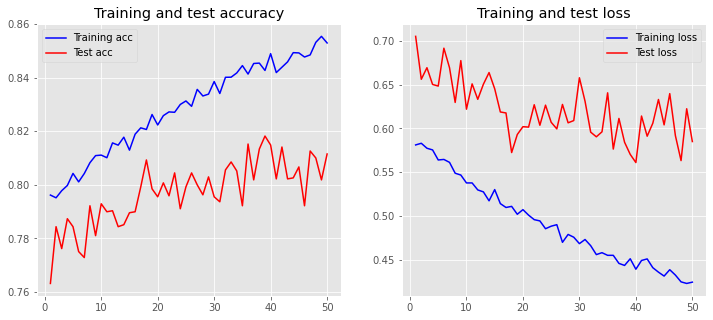

In [58]:
#continuing the training 

h4=model4.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model4.save('small_rnn_model_cont')


plot_history(h4)

Epoch 1/50
673/673 [==============================] - 146s 216ms/step - loss: 0.4095 - accuracy: 0.8571 - val_loss: 0.5681 - val_accuracy: 0.8249
Epoch 2/50
673/673 [==============================] - 146s 217ms/step - loss: 0.4198 - accuracy: 0.8543 - val_loss: 0.5591 - val_accuracy: 0.8167
Epoch 3/50
673/673 [==============================] - 146s 217ms/step - loss: 0.4177 - accuracy: 0.8532 - val_loss: 0.5676 - val_accuracy: 0.8160
Epoch 4/50
673/673 [==============================] - 145s 216ms/step - loss: 0.4114 - accuracy: 0.8567 - val_loss: 0.5573 - val_accuracy: 0.8275
Epoch 5/50
673/673 [==============================] - 146s 216ms/step - loss: 0.3981 - accuracy: 0.8617 - val_loss: 0.5684 - val_accuracy: 0.8186
Epoch 6/50
673/673 [==============================] - 146s 216ms/step - loss: 0.4074 - accuracy: 0.8596 - val_loss: 0.5634 - val_accuracy: 0.8193
Epoch 7/50
673/673 [==============================] - 146s 216ms/step - loss: 0.3990 - accuracy: 0.8616 - val_loss: 0.5636 -

INFO:tensorflow:Assets written to: small_rnn_model_cont_v2\assets


INFO:tensorflow:Assets written to: small_rnn_model_cont_v2\assets


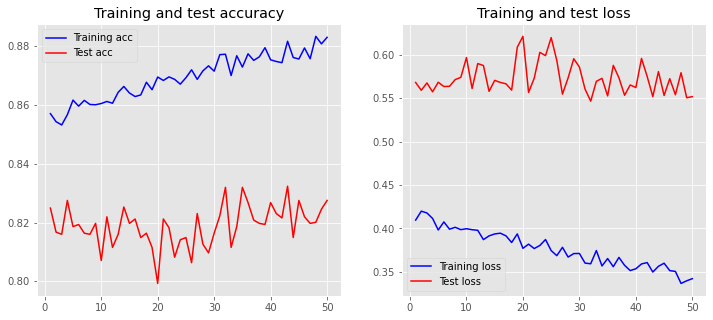

In [59]:
#continuing the training 

h4=model4.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model4.save('small_rnn_model_cont_v2')


plot_history(h4)

Final Evaluation - Model3 is best

In [63]:
import keras

model3 = keras.models.load_model('full_rnn_model')
model3.evaluate(x={'audio_in': x_valid_audio, 'theme_in': x_valid_theme},y={'op': y_valid})




85/85 [==============================] - 24s 249ms/step - loss: 0.6662 - accuracy: 0.8539


[0.666243314743042, 0.8539033532142639]